In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv("BIKE DETAILS.csv")

In [ ]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [ ]:
# =name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")Z
# selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)Z
# year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)Z
# seller_type: Seller category, either "Individual" or "Dealer" (Categorical)Z
# owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)Z
# km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)Z
# ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).

In [ ]:
#What is the range of selling prices in the dataset?
range = df['selling_price'].max() - df['selling_price'].min()
print("The range of selling prices is: ", range)

The range of selling prices is:  755000


In [ ]:
#What is the median selling price for bikes in the dataset?
median = df['selling_price'].median()
print("The median selling price is: ", median)

The median selling price is:  45000.0


In [ ]:
#What is the most common seller type?
most_common_seller_type = df['seller_type'].mode()[0]
print("The most common seller type is: ", most_common_seller_type)

The most common seller type is:  Individual


In [ ]:
#How many bikes have driven more than 50,000 kilometers?
df[df['km_driven']>=50000].shape
#207 bikes have driven more than 50,000 kilometers.

(207, 7)

In [ ]:
#What is the average km_driven value for each ownership type?
avg_km_driven_by_owner = df.groupby('owner')['km_driven'].mean()
print(avg_km_driven_by_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
#What proportion of bikes are from the year 2015 or older?
proportion_2015_or_older = df[df['year'] <= 2015].shape[0] / df.shape[0]
print("Proportion of bikes from 2015 or older: ", proportion_2015_or_older)

Proportion of bikes from 2015 or older:  0.5664467483506126


In [ ]:
#What is the trend of missing values across the dataset?
df.isnull().sum()
#the dataset has 435 missing values in the ex_showroom-price column

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [ ]:
#What is the highest ex_showroom_price recorded, and for which bike?
df['ex_showroom_price'].max()
print("The highest ex_showroom_price recorded is: ", df['ex_showroom_price'].max())

print("The bike with the highest ex_showroom_price is: ", df[df['ex_showroom_price'] == df['ex_showroom_price'].max()]['name'].values[0])

The highest ex_showroom_price recorded is:  1278000.0
The bike with the highest ex_showroom_price is:  Harley-Davidson Street Bob


In [ ]:
#What is the total number of bikes listed by each seller type?
total_bikes_by_seller_type = df['seller_type'].value_counts()
print(total_bikes_by_seller_type)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


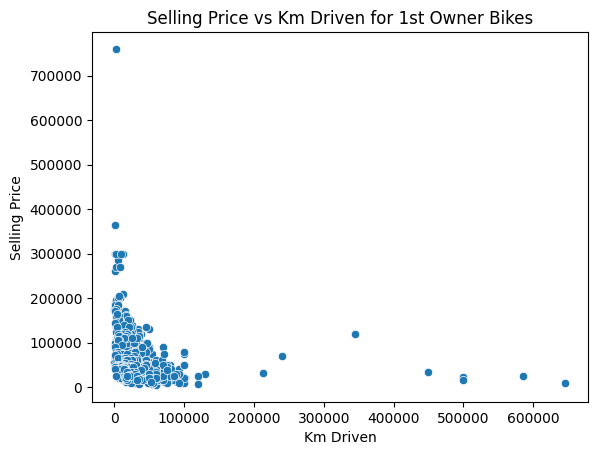

In [ ]:
#What is the relationship between selling_price and km_driven for first-owner bikes?
sns.scatterplot(data=df[df['owner'] == '1st owner'], x='km_driven', y='selling_price')
plt.title('Selling Price vs Km Driven for 1st Owner Bikes')
plt.xlabel('Km Driven')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
#Identify and remove outliers in the km_driven column using the IQR method?
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
df_outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
df_outliers #outliers identified
# print("Number of rows before removing outliers: ", df.shape[0])
# print("Number of outliers removed: ", df_outliers.shape[0])


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
91,Honda Activa [2000-2015],22989,2012,Individual,1st owner,500000,50267.0
93,Suzuki GS150R,30000,2010,Individual,1st owner,130000,70851.0
115,Hero Honda Passion Plus,7500,2004,Individual,1st owner,120000,NaN
135,Hero Honda CBZ extreme,20000,2007,Individual,1st owner,90000,NaN
154,Hero Xtreme Sports,22000,2014,Individual,1st owner,99000,78350.0
184,Honda CB Unicorn 160,75000,2015,Individual,1st owner,100000,79233.0
363,Hero Honda CD100SS,10000,1997,Individual,1st owner,646000,NaN
470,Honda Activa [2000-2015],23000,2009,Individual,1st owner,95000,50267.0
474,Hero Honda Passion PRO [2012],12000,2012,Individual,1st owner,90000,NaN
477,Honda Activa [2000-2015],25000,2009,Individual,1st owner,585659,50267.0


In [ ]:
df_no_outliers #ouliers removed


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


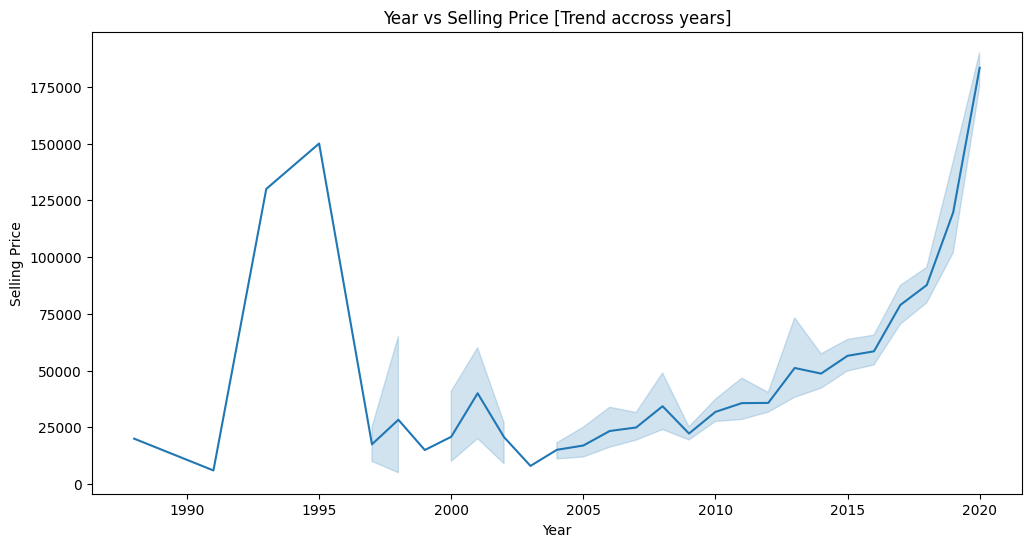

In [ ]:
#Perform a bivariate analysis to visualize the relationship between year and selling_price?
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='selling_price')
plt.title('Year vs Selling Price [Trend accross years]')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

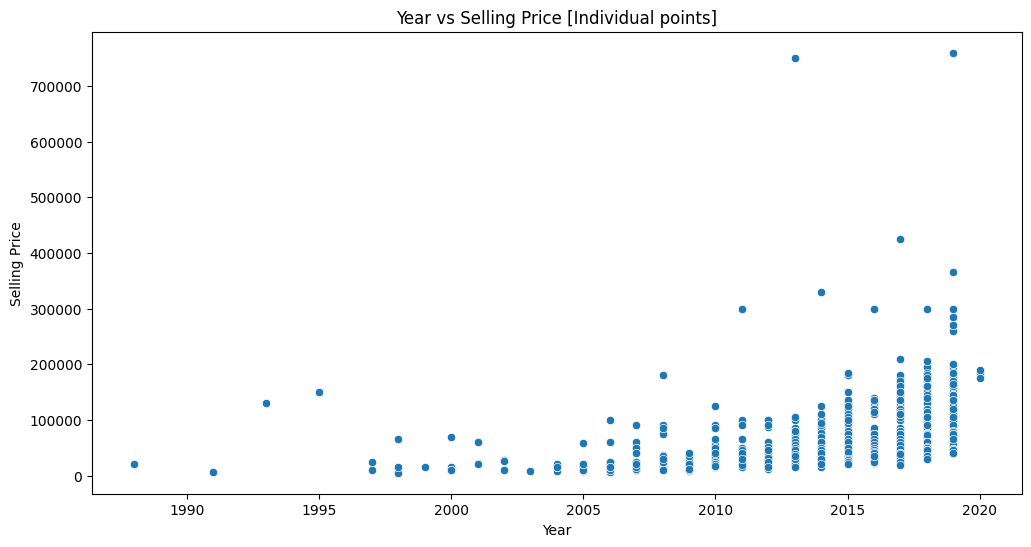

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title('Year vs Selling Price [Individual points]')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
#What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
df.year.max()

np.int64(2020)

In [ ]:
depriciation = df['selling_price'] / (2021 - df['year'])
df['depreciation'] = depriciation

In [ ]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,depreciation
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,87500.000000
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,11250.000000
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,50000.000000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,10833.333333
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,2000.000000
...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0,1545.454545
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,1777.777778
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,1875.000000
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,1000.000000


In [ ]:
#avg dereciation
df['depreciation'].mean()

np.float64(15426.52544419472)

In [ ]:
#Which bike names are priced significantly above the average price for their manufacturing year?
avg_price_by_year = df.groupby('year')['selling_price'].mean()
avg_price_by_year

year
1988     20000.000000
1991      6000.000000
1993    130000.000000
1995    150000.000000
1997     17500.000000
1998     28333.333333
1999     15000.000000
2000     20833.333333
2001     40000.000000
2002     20666.666667
2003      8000.000000
2004     15100.000000
2005     16978.571429
2006     23380.000000
2007     24927.586207
2008     34289.285714
2009     22267.857143
2010     31793.333333
2011     35655.721311
2012     35748.400000
2013     51136.986301
2014     48668.131868
2015     56500.000000
2016     58469.018692
2017     78894.736842
2018     87660.374046
2019    119689.511628
2020    183333.333333
Name: selling_price, dtype: float64

In [ ]:
df['avg_price_for_year'] = df['year'].map(avg_price_by_year)
df_above_avg = df[df['selling_price'] > df['avg_price_for_year']]
print(df_above_avg['name'])
#334 bikes are priced significantly above the average price for their manufacturing year.


0                  Royal Enfield Classic 350
2        Royal Enfield Classic Gunmetal Grey
3          Yamaha Fazer FI V 2.0 [2016-2018]
7       Royal Enfield Bullet 350 [2007-2011]
13                             Yamaha YZF R3
                        ...                 
1004                    Bajaj Pulsar  NS 200
1005                      TVS Apache RTR 160
1008                      Bajaj Pulsar 220 F
1012                     Bajaj Pulsar NS 200
1023                  Bajaj Avenger 220 dtsi
Name: name, Length: 334, dtype: object


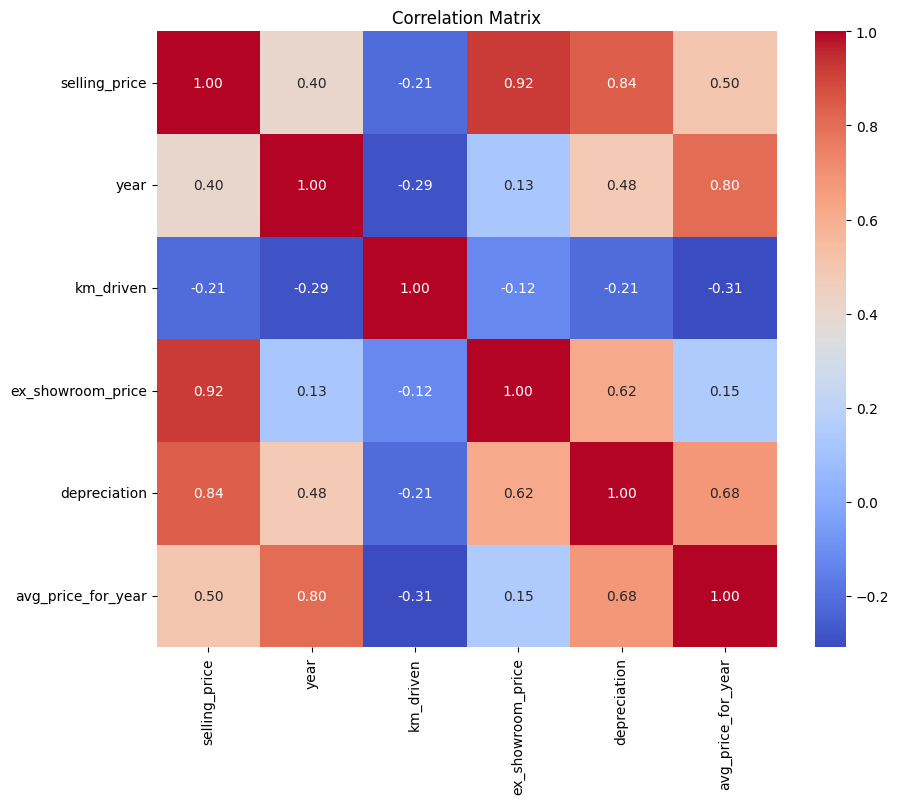

In [ ]:
# Develop a correlation matrix for numeric columns and visualize it using a heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df1 = pd.read_csv('Car sale.csv')

In [ ]:
df1

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [ ]:
#  Car_id: A unique identifier for each car in the dataset, helping to track individual car entries
#  Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD
#  Customer Name: The name of the customer who purchased the car, represented as a string
#  Gender: The gender of the customer, categorized as "Male" or "Female.
#  Annual Income: The customer's annual income in US dollars, represented as a numeric value
#  Dealer_Name: The name of the dealership selling the car, represented as a string
#  Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc
#  Model: The specific model name of the car, such as "Corolla," "Civic," etc
#  Engine: The engine type of the car, such as "V6," "I4," etc
#  Transmission: The type of transmission in the car, either "Manual" or "Automatic.
#  Color: The color of the car, represented as a string (e.g., "Red," "Blue")
#  Price ($): The selling price of the car in US dollars
#  Dealer_No: A unique identifier for each car dealer in the dataset
#  Body Style: The body style of the car, such as "Sedan," "SUV," etc
#  Phone: The phone number of the customer who purchased the car
#  Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

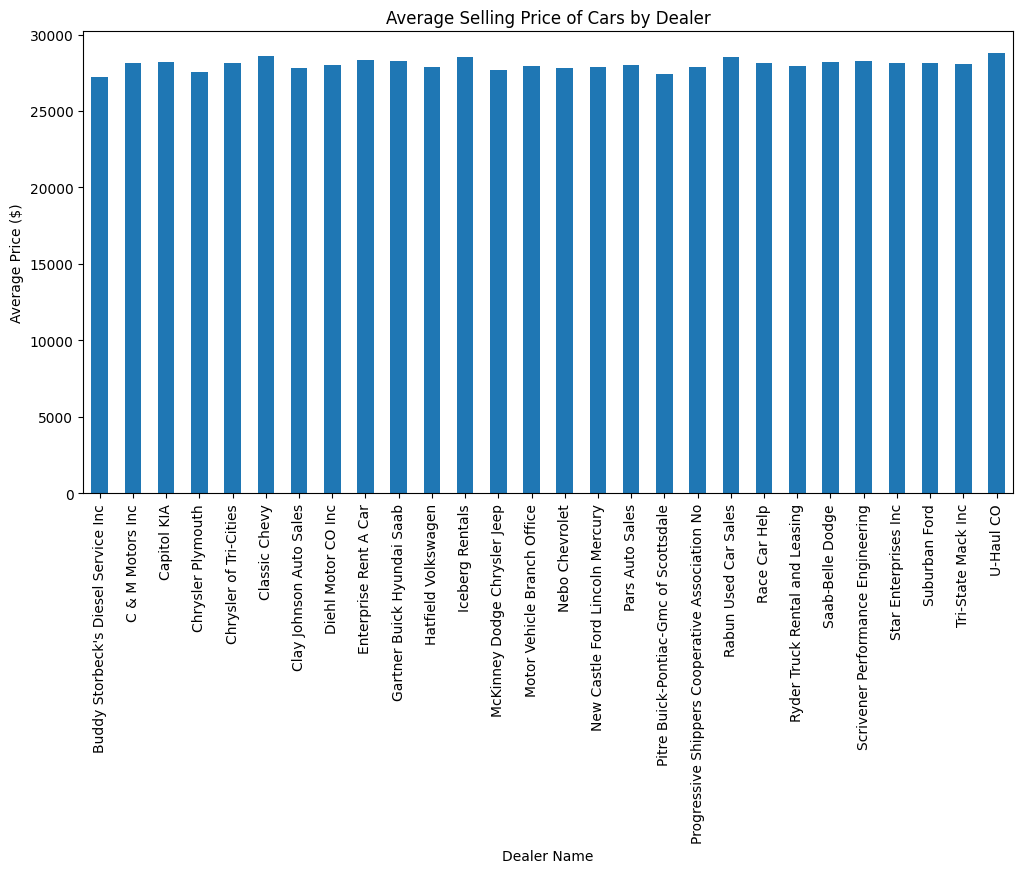

In [ ]:
#What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price_by_dealer = df1.groupby('Dealer_Name')['Price ($)'].mean()
print(avg_price_by_dealer)
avg_price_by_dealer.plot(kind='bar', figsize=(12, 6))
plt.title('Average Selling Price of Cars by Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Price ($)')
plt.show()

Company
Acura          8183.046414
Audi          12904.243867
BMW           15065.578723
Buick         17142.232626
Cadillac      19517.120220
Chevrolet     13311.063223
Chrysler      11583.286811
Dodge         11187.592085
Ford          15849.090227
Honda         11148.629062
Hyundai        3485.982649
Infiniti      13696.332844
Jaguar        10222.531533
Jeep           9459.834418
Lexus         17852.923492
Lincoln       19658.050211
Mercedes-B    15722.807459
Mercury       16445.172195
Mitsubishi    11671.343035
Nissan        16214.264017
Oldsmobile    15711.345857
Plymouth      19065.997338
Pontiac       14348.963592
Porsche        5261.839206
Saab          19653.740089
Saturn        15990.223671
Subaru        12920.771620
Toyota        15367.131714
Volkswagen    12527.124011
Volvo         12933.790185
Name: Price ($), dtype: float64
The car brand with the highest variation in prices is:  Lincoln


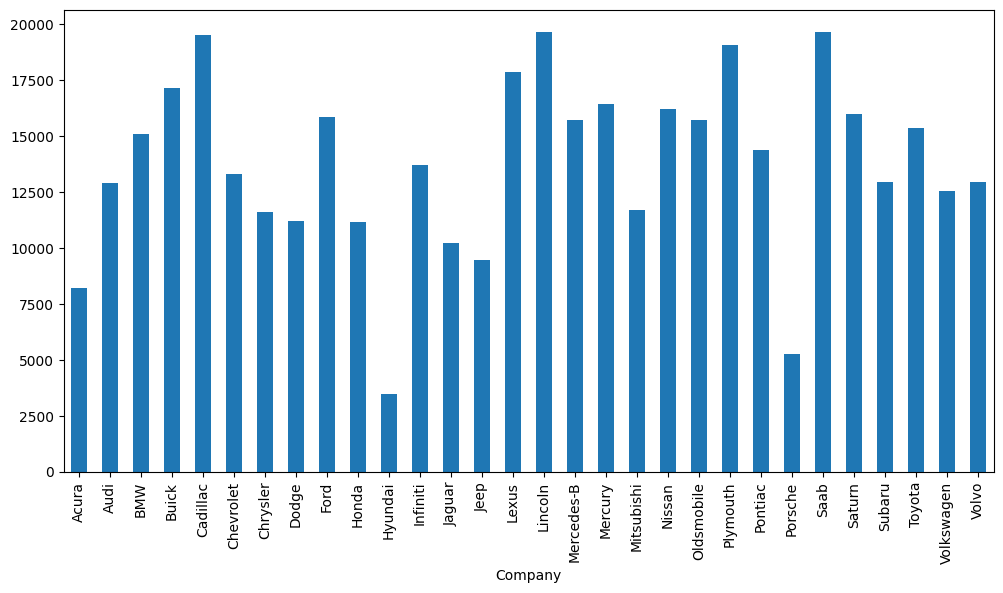

In [ ]:
#Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trend?
price_variation_by_brand = df1.groupby('Company')['Price ($)'].std()
print(price_variation_by_brand)
price_variation_by_brand.plot(kind='bar', figsize=(12, 6))
print("The car brand with the highest variation in prices is: ", price_variation_by_brand.idxmax())
#lincoln has the highest variation in prices

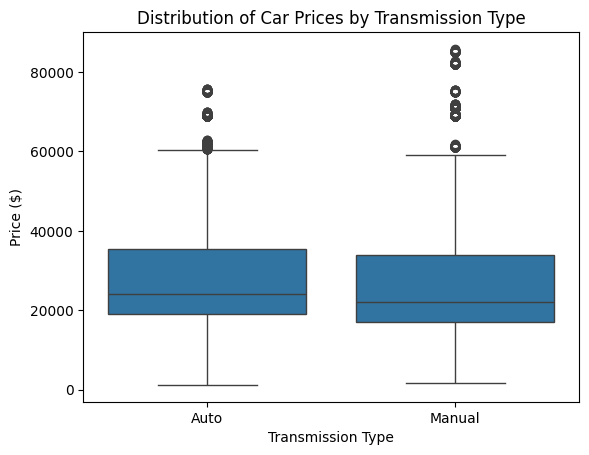

In [ ]:
#What is the distribution of car prices for each transmission type, and how do the interquartile ranges cpmpare?
sns.boxplot(data=df1, x='Transmission', y='Price ($)')
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

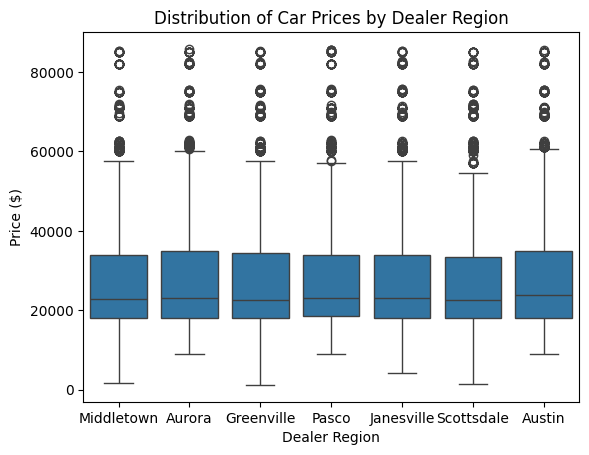

In [ ]:
#What is the distribution of car prices across different regions?
sns.boxplot(data=df1, x='Dealer_Region', y='Price ($)')
plt.title('Distribution of Car Prices by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.show()

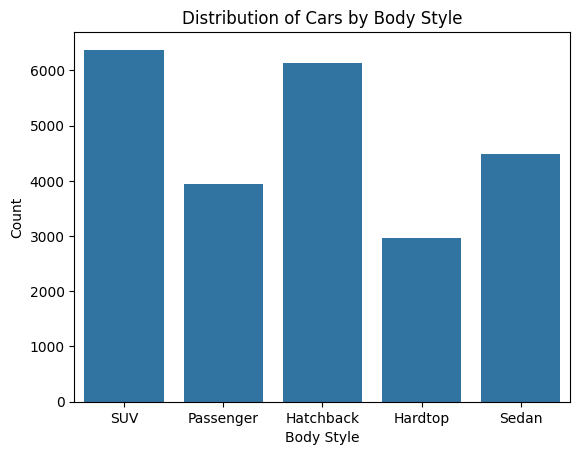

In [ ]:
#What is the distribution of cars based on body styles?
sns.countplot(data=df1, x='Body Style')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

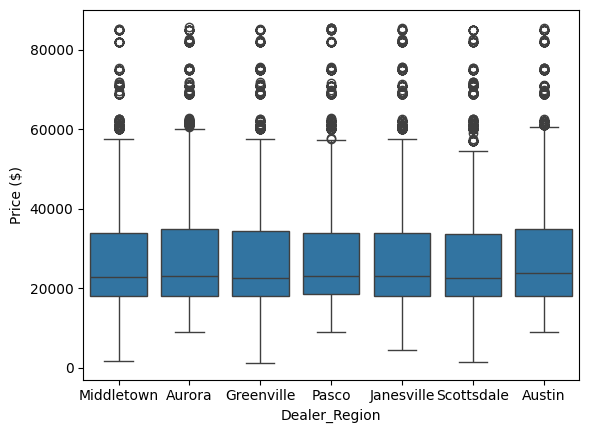

In [ ]:
#  What is the distribution of car prices by region, and how does the number of cars sold vary by region?
sns.boxplot(data=df1, x='Dealer_Region', y='Price ($)')



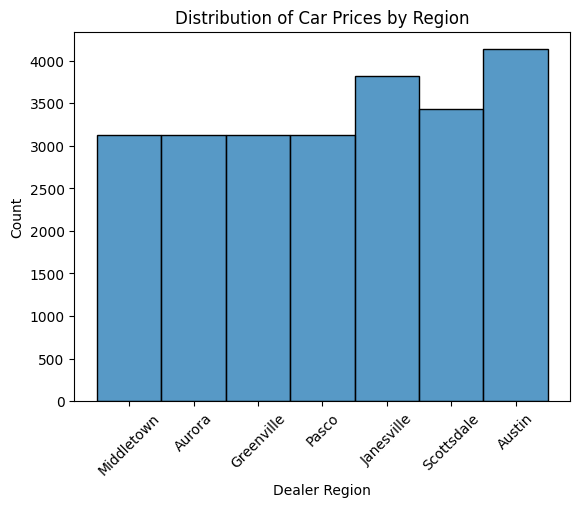

In [ ]:
sns.histplot(data=df1, x='Dealer_Region', bins=30)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#How does the average car price differ between cars with different engine sizes?
avg_car_price= df1.groupby('Engine')['Price ($)'].mean()
print(avg_car_price)
print('They differ by: ', avg_car_price.max() - avg_car_price.min())


Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64
They differ by:  333.81534168674625


In [ ]:
#How do car prices vary based on the customer’s annual income bracket?
income_bracket = pd.cut(df1['Annual Income'], bins=[0, 30000, 60000, 90000, 120000, np.inf], labels=['Low', 'Medium', 'High', 'Very High', 'Ultra High'])
df1['Income Bracket'] = income_bracket
df1

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Bracket
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Low
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,Ultra High
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,Ultra High
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,Low
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,Ultra High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco,Low
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown,Ultra High
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale,Ultra High
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin,Low


In [ ]:
df1[df1['Income Bracket']== 'Ultra High']

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Bracket
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,Ultra High
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,Ultra High
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,Ultra High
5,C_CND_000006,1/2/2022,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,85257-3102,Hatchback,7315216,Scottsdale,Ultra High
6,C_CND_000007,1/2/2022,Hailey,Male,1600000,Clay Johnson Auto Sales,Toyota,Corolla,Overhead Camshaft,Manual,Pale White,14000,78758-7841,Passenger,7727879,Austin,Ultra High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23898,C_CND_023899,12/31/2023,Skylar,Male,530000,Rabun Used Car Sales,Volvo,C70,Overhead Camshaft,Manual,Pale White,24000,85257-3102,Hatchback,6225183,Pasco,Ultra High
23900,C_CND_023901,12/31/2023,Nathan,Female,771000,Buddy Storbeck's Diesel Service Inc,Ford,Contour,DoubleÂ Overhead Camshaft,Auto,Red,19000,06457-3834,Sedan,8170003,Greenville,Ultra High
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown,Ultra High
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale,Ultra High


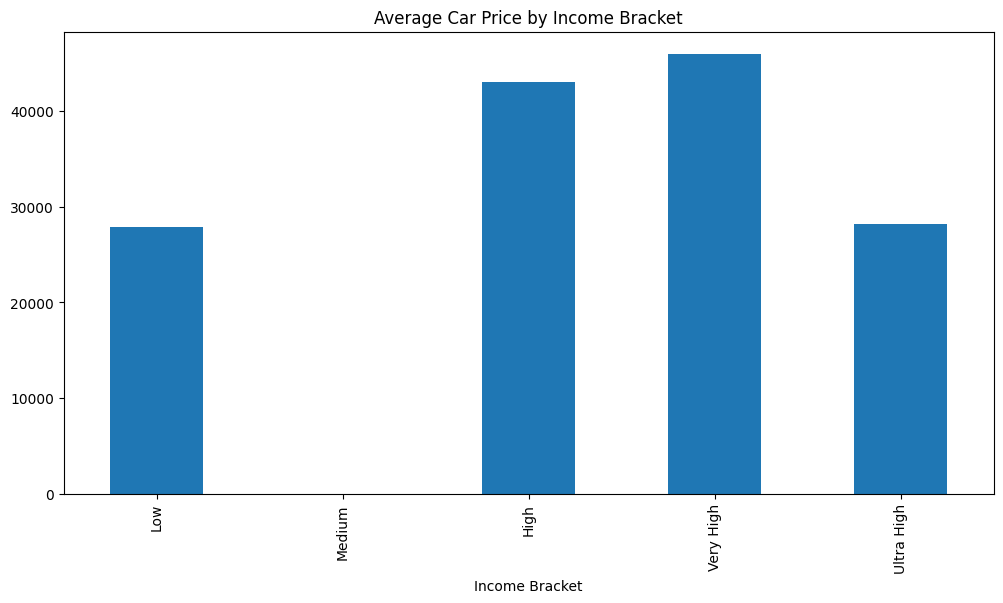

In [ ]:
df1.groupby('Income Bracket')['Price ($)'].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Average Car Price by Income Bracket')
plt.show()
#there is no customer with medium income bracket

In [ ]:
#What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_5_models = df1['Model'].value_counts().head(5)
print(top_5_models)

Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


Text(0.5, 1.0, 'Price Distribution of Top 5 Car Models with Highest Sales')

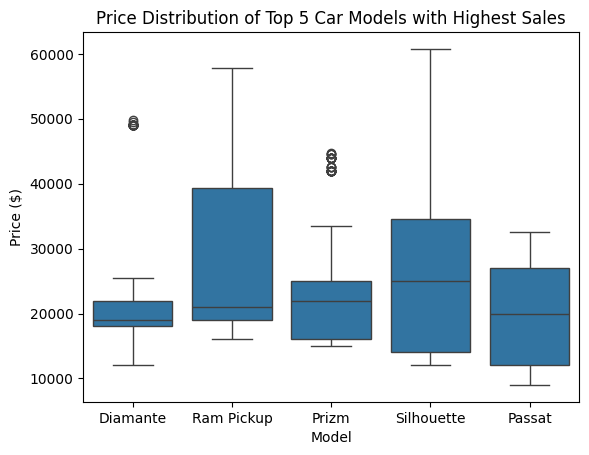

In [ ]:
sns.boxplot(data=df1[df1['Model'].isin(top_5_models.index)], x='Model', y='Price ($)')
plt.title('Price Distribution of Top 5 Car Models with Highest Sales')

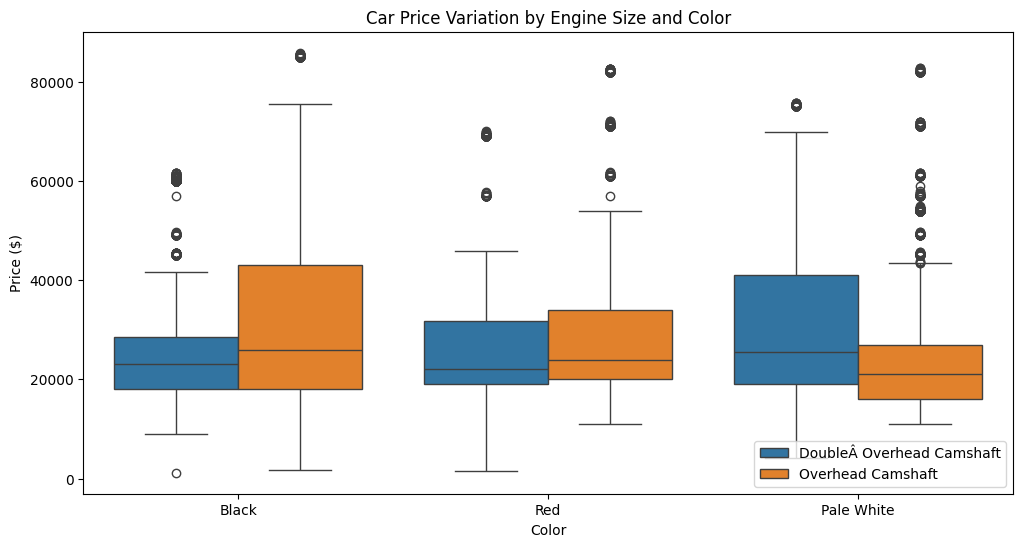

In [ ]:
# How does car price vary with engine size across different car colors, and which colors have the highest price variation?
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='Color', y='Price ($)', hue='Engine')
plt.title('Car Price Variation by Engine Size and Color')
plt.legend()

In [ ]:
#for highest price variation of the car colors
price_variation_by_color = df1.groupby('Color')['Price ($)'].std()
print(price_variation_by_color) #red has the highest price variation

Color
Black         15286.065976
Pale White    14077.346859
Red           15519.360962
Name: Price ($), dtype: float64


In [ ]:
df1

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Bracket
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Low
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,Ultra High
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,Ultra High
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,Low
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,Ultra High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco,Low
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown,Ultra High
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale,Ultra High
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin,Low


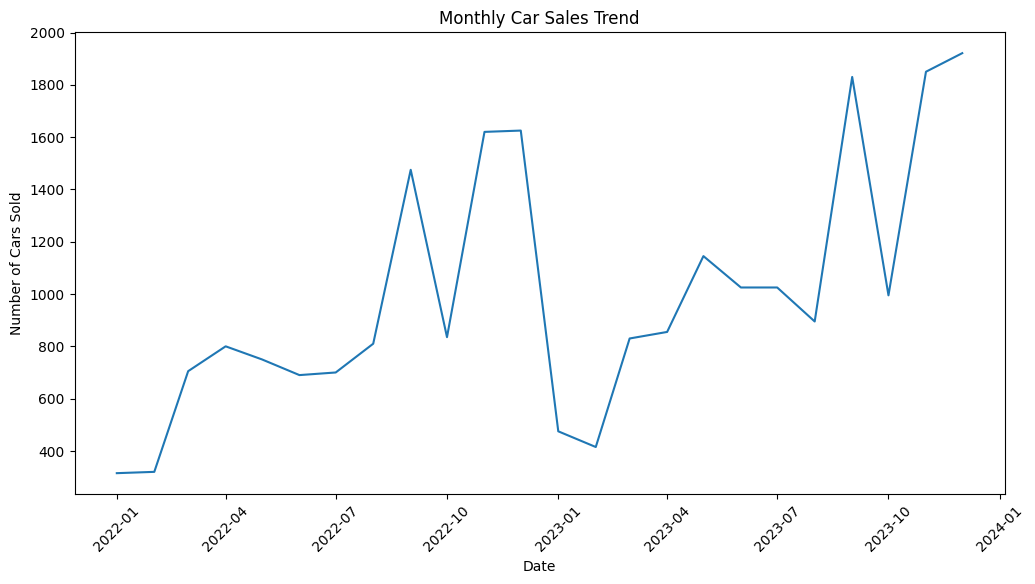

In [ ]:
# Is there any seasonal trend in car sales based on the date of sale?
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year
monthly_sales = df1.groupby(['Year', 'Month']).size().reset_index(name='Sales')
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Date', y='Sales')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Date')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

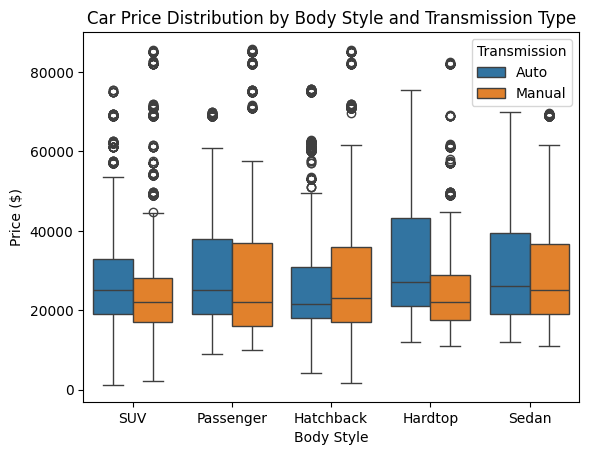

In [ ]:
# How does the car price distribution change when considering different combinations of body style and transmission type?
sns.boxplot(data=df1, x='Body Style', y='Price ($)', hue='Transmission')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.legend(title='Transmission')
plt.show()


In [ ]:
df1.Model.value_counts()

Model
Diamante         418
Prizm            411
Silhouette       411
Passat           391
Ram Pickup       383
                ... 
Mirage            19
Alero             18
RX300             15
Avalon            15
Sebring Conv.     10
Name: count, Length: 154, dtype: int64

             Model                     Engine     Price ($)
0           Taurus  DoubleÂ Overhead Camshaft  11665.538462
1           Taurus          Overhead Camshaft  47781.432624
2   Town & Country  DoubleÂ Overhead Camshaft  42150.166667
3   Town & Country          Overhead Camshaft  17047.952381
4         Town car  DoubleÂ Overhead Camshaft  22230.620253
5         Town car          Overhead Camshaft  23113.268293
6              V40  DoubleÂ Overhead Camshaft  18045.727273
7              V70  DoubleÂ Overhead Camshaft  39051.512195
8         Villager  DoubleÂ Overhead Camshaft  26986.857143
9         Villager          Overhead Camshaft  14394.094737
10           Viper  DoubleÂ Overhead Camshaft  32118.479167
11           Viper          Overhead Camshaft  26052.375000
12         Voyager  DoubleÂ Overhead Camshaft  22066.026316
13         Voyager          Overhead Camshaft  33995.678322
14        Windstar  DoubleÂ Overhead Camshaft  25145.636364
15        Windstar          Overhead Cam

Text(0.5, 1.0, 'Average Car Price by Model and Engine Type')

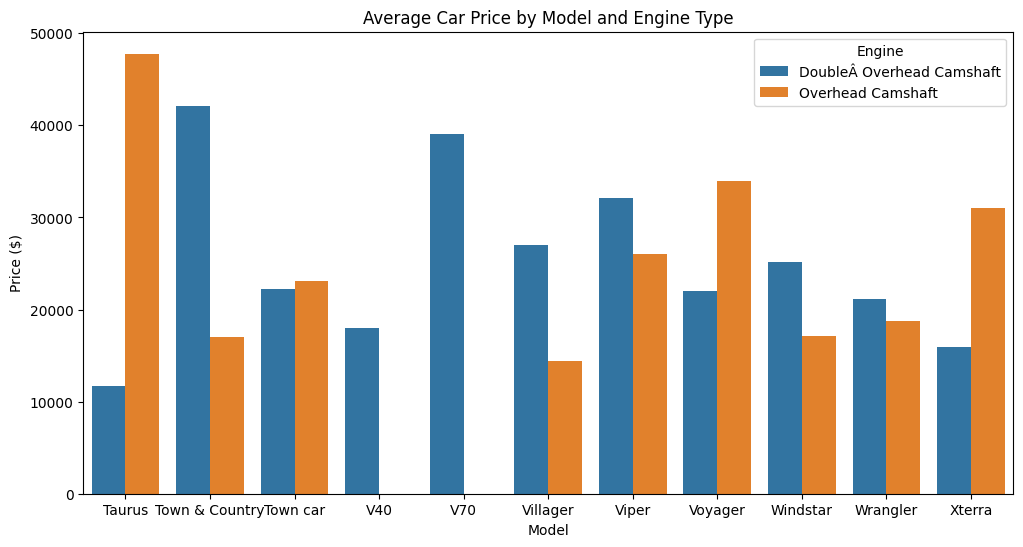

In [ ]:
#How does the average car price vary across different car models and engine types?
avg_price_by_model_engine = df1.groupby(['Model', 'Engine'])['Price ($)'].mean().tail(20).reset_index()
print(avg_price_by_model_engine)

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_model_engine, x='Model', y='Price ($)', hue='Engine')
plt.title('Average Car Price by Model and Engine Type')

In [ ]:
df2 = pd.read_csv('amazon.csv')
df2

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
df2['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [ ]:
df2['rating'] = df2['rating'].str.replace('|','0').astype(float)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   object 
 4   actual_price         1465 non-null   object 
 5   discount_percentage  1465 non-null   object 
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [ ]:
df2.category.unique()

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

In [ ]:
#What is the average rating for each product category?
avg_rating_df = df2.groupby('category')['rating'].mean().reset_index()
avg_rating_df

,category,rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.800000
1,Computers&Accessories|Accessories&Peripherals|...,4.150000
2,Computers&Accessories|Accessories&Peripherals|...,3.500000
3,Computers&Accessories|Accessories&Peripherals|...,3.600000
4,Computers&Accessories|Accessories&Peripherals|...,4.050000
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.250000
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.150000
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.300000
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.133333


In [ ]:
df2.rating_count = df2.rating_count.str.replace(',','').astype(float)

In [ ]:
#What are the top rating_count products by category?
top_rating_count_df = df2.groupby('category')['rating_count'].sum().reset_index(name='rating_count')
top_rating_count_df = top_rating_count_df.sort_values(by='rating_count', ascending=False)
top_rating_count_df.head(10).sort_values(by='rating_count', ascending=False)

,category,rating_count
76,"Electronics|Headphones,Earbuds&Accessories|Hea...",4204939.0
10,Computers&Accessories|Accessories&Peripherals|...,3547816.0
117,Electronics|Mobiles&Accessories|Smartphones&Ba...,2493269.0
89,"Electronics|HomeTheater,TV&Video|Accessories|C...",1906054.0
119,Electronics|WearableTechnology|SmartWatches,1644476.0
58,Electronics|Accessories|MemoryCards|MicroSD,1113592.0
42,Computers&Accessories|ExternalDevices&DataStor...,774744.0
97,"Electronics|HomeTheater,TV&Video|Televisions|S...",760279.0
49,Computers&Accessories|NetworkingDevices|Networ...,727113.0
103,Electronics|Mobiles&Accessories|MobileAccessor...,688810.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   object 
 4   actual_price         1465 non-null   object 
 5   discount_percentage  1465 non-null   object 
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [ ]:
df2.discounted_price = df2.discounted_price.str.replace('₹','').str.replace(',','').astype(float)
df2.actual_price = df2.actual_price.str.replace('₹','').str.replace(',','').astype(float)

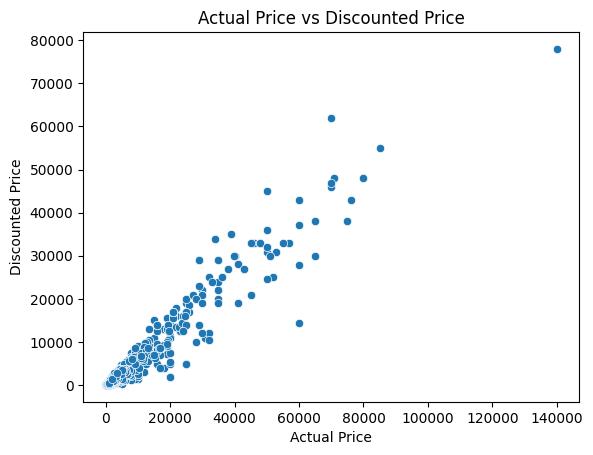

In [ ]:
#What is the distribution of discounted prices vs. actual prices?
sns.scatterplot(data=df2, x='actual_price', y='discounted_price')
plt.title('Actual Price vs Discounted Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()


In [ ]:
df2.discount_percentage = df2.discount_percentage.str.replace('%','').astype(float)

In [ ]:
#How does the average discount percentage vary across categories?
avg_discount_df = df2.groupby('category')['discount_percentage'].mean().reset_index()
avg_discount_df = avg_discount_df.sort_values(by='discount_percentage', ascending=False)
avg_discount_df.sort_values(by='discount_percentage', ascending=False)


,category,discount_percentage
6,Computers&Accessories|Accessories&Peripherals|...,90.0
75,"Electronics|Headphones,Earbuds&Accessories|Ear...",90.0
106,Electronics|Mobiles&Accessories|MobileAccessor...,90.0
73,"Electronics|Headphones,Earbuds&Accessories|Ada...",88.0
14,Computers&Accessories|Accessories&Peripherals|...,87.5
...,...,...
197,OfficeProducts|OfficeElectronics|Calculators|F...,0.0
199,OfficeProducts|OfficePaperProducts|Paper|Copy&...,0.0
205,OfficeProducts|OfficePaperProducts|Paper|Stati...,0.0
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,0.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [ ]:
#What are the most popular product names?
popular_products = df2.groupby('product_name')['rating_count'].sum().reset_index(name='rating_count')
popular_products = popular_products.sort_values(by='rating_count', ascending=False)
popular_products.head(10)


,product_name,rating_count
101,AmazonBasics Flexible Premium HDMI Cable (Blac...,853945.0
76,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
75,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
511,"JBL C100SI Wired In Ear Headphones with Mic, J...",385177.0
1257,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
1256,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
1253,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711.0
900,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836.0
898,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836.0
901,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",313832.0


                  discounted_price    rating
discounted_price          1.000000  0.114298
rating                    0.114298  1.000000


<Axes: >

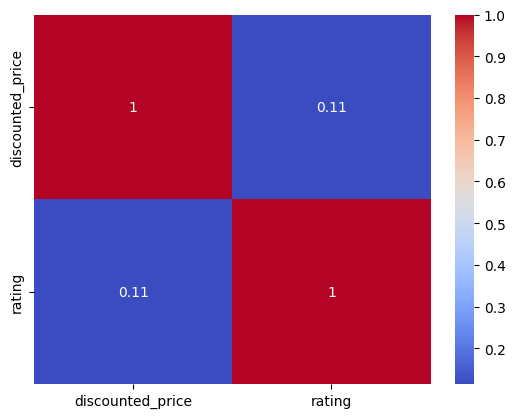

In [ ]:
# What is the correlation between discounted_price and ratingk
corr = df2[['discounted_price', 'rating']].corr()
print(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
#' What are the Top 5 categories based on the highest ratings?
top_categories = df2.groupby('category')['rating'].mean().reset_index()
top_categories = top_categories.sort_values(by='rating', ascending=False).head(5)
print(top_categories)

                                             category  rating
57                      Computers&Accessories|Tablets     4.6
48  Computers&Accessories|NetworkingDevices|Networ...     4.5
62   Electronics|Cameras&Photography|Accessories|Film     4.5
38            Computers&Accessories|Components|Memory     4.5
81  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5


In [ ]:
#Identify any potential areas for improvement or optimization based on the data analysis?
#Based on the analysis, a combination of data-driven pricing, inventory planning, and customer feedback monitoring can help optimize Amazon’s sales strategy and improve customer satisfaction.

In [ ]:
df3 = pd.read_csv('spotify.csv')
df3

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [ ]:
df3.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [ ]:
df3.duplicated().sum()

np.int64(27)

In [ ]:
df3.drop_duplicates(inplace=True)
df3.duplicated().sum()

np.int64(0)

<Axes: xlabel='Popularity', ylabel='Count'>

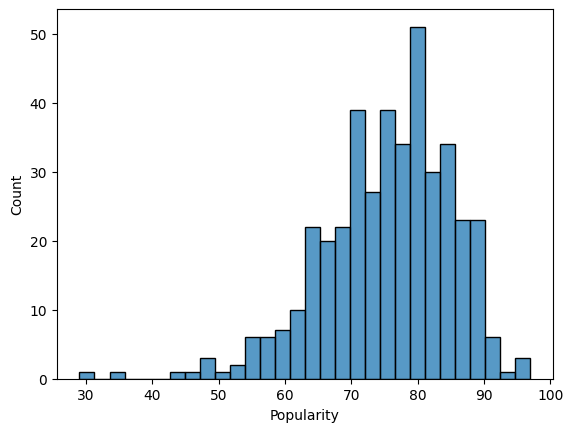

In [ ]:
sns.histplot(data=df3, x='Popularity', bins=30)

<Axes: xlabel='Duration (ms)', ylabel='Popularity'>

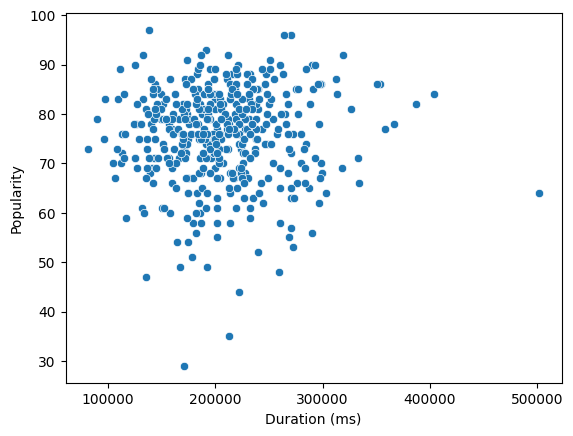

In [ ]:
sns.scatterplot(data=df3, x='Duration (ms)', y='Popularity')

In [ ]:
artist_songs = df3.groupby('Artist')['Track Name'].count()
artist_songs = artist_songs.reset_index(name='Number of Songs')
artist_songs = artist_songs.sort_values(by='Number of Songs', ascending=False)
artist_songs
#Drake is the artist with the most songs in the dataset, with a total of 17 songs.

,Artist,Number of Songs
29,Drake,17
33,Eminem,11
2,21 Savage,10
36,Flo Rida,10
46,JAY-Z,10
...,...,...
99,That Mexican OT,1
110,Young Nudy,1
108,XXXTENTACION,1
112,benny blanco,1


In [ ]:
df3.sort_values(by='Popularity', ascending=True).head(5)

,Artist,Track Name,Popularity,Duration (ms),Track ID
207,Pressa,Attachments (feat. Coi Leray),29,171000,6EfJ8Ct3GHbBz2YlyPnMYb
231,Justin Bieber,Intentions,35,212853,7jAVt70Xdg8EwOtsFB1ZqK
413,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
225,Lil Baby,On Me - Remix,47,135444,2uUFVnVFERNxUdcmvEs7LB
407,Wyclef Jean,911 (feat. Mary J. Blige),48,259333,28hgx2bWXcaBJeC9zVwrBq


In [ ]:
avg_popularity = df3.groupby('Artist')['Popularity'].mean()
avg_popularity = avg_popularity.reset_index(name='Average Popularity')
avg_popularity = avg_popularity.sort_values(by='Average Popularity', ascending=False)
avg_popularity


,Artist,Average Popularity
113,cassö,92.000000
104,Trueno,89.000000
24,David Guetta,87.000000
103,Travis Scott,86.555556
114,¥$,85.100000
...,...,...
89,RAYE,55.000000
107,Wyclef Jean,54.500000
7,Arizona Zervas,54.000000
52,Justin Bieber,49.000000


In [ ]:
avg_popularity.head(5) #top 5 artists by average popularity

,Artist,Average Popularity
113,cassö,92.000000
104,Trueno,89.000000
24,David Guetta,87.000000
103,Travis Scott,86.555556
114,¥$,85.100000


In [ ]:
top_artists = avg_popularity['Artist'].head(5).tolist()
top_artist_tracks = df3[df3['Artist'].isin(top_artists)]

most_popular_tracks = (
    top_artist_tracks.sort_values(by='Popularity', ascending=False)
                     .groupby('Artist')
                     .head(1)
                     .reset_index(drop=True)
)
most_popular_tracks[['Artist', 'Track Name', 'Popularity']]

,Artist,Track Name,Popularity
0,¥$,CARNIVAL,96
1,Travis Scott,FE!N (feat. Playboi Carti),93
2,cassö,Prada,92
3,Trueno,Mamichula - con Nicki Nicole,89
4,David Guetta,Baby Don't Hurt Me,87


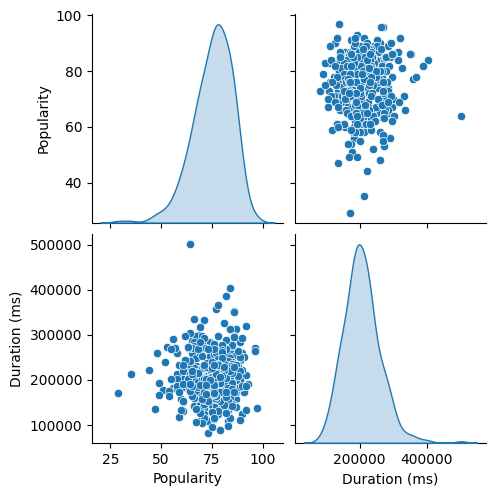

In [ ]:
sns.pairplot(df3, diag_kind='kde', markers='o')

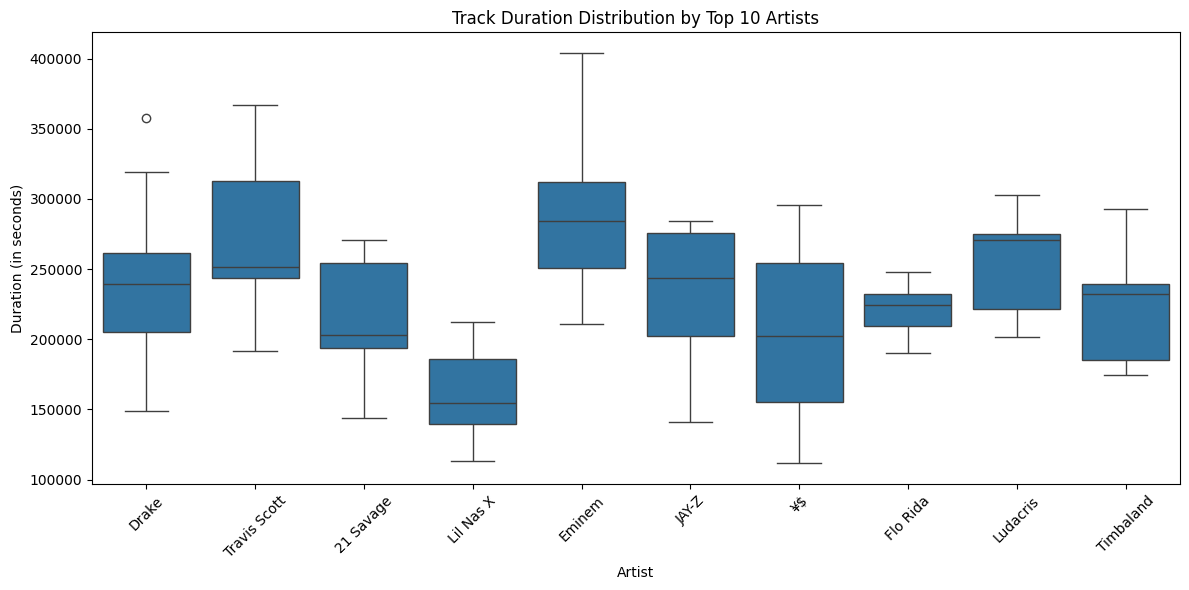

In [ ]:
# avg_duration_of_artist = df3.groupby('Artist')['Duration (ms)'].mean()
# avg_duration_of_artist = avg_duration_of_artist.reset_index(name='Average Duration (ms)').head(10)
# sns.violinplot(data=avg_duration_of_artist, x='Artist', y='Average Duration (ms)')
# plt.title('Average Duration of Songs by Artist')
top_artists = df3['Artist'].value_counts().head(10).index.tolist()
filtered_df = df3[df3['Artist'].isin(top_artists)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Artist', y='Duration (ms)')
plt.xticks(rotation=45)
plt.title('Track Duration Distribution by Top 10 Artists')
plt.ylabel('Duration (in seconds)')
plt.xlabel('Artist')
plt.tight_layout()
plt.show()



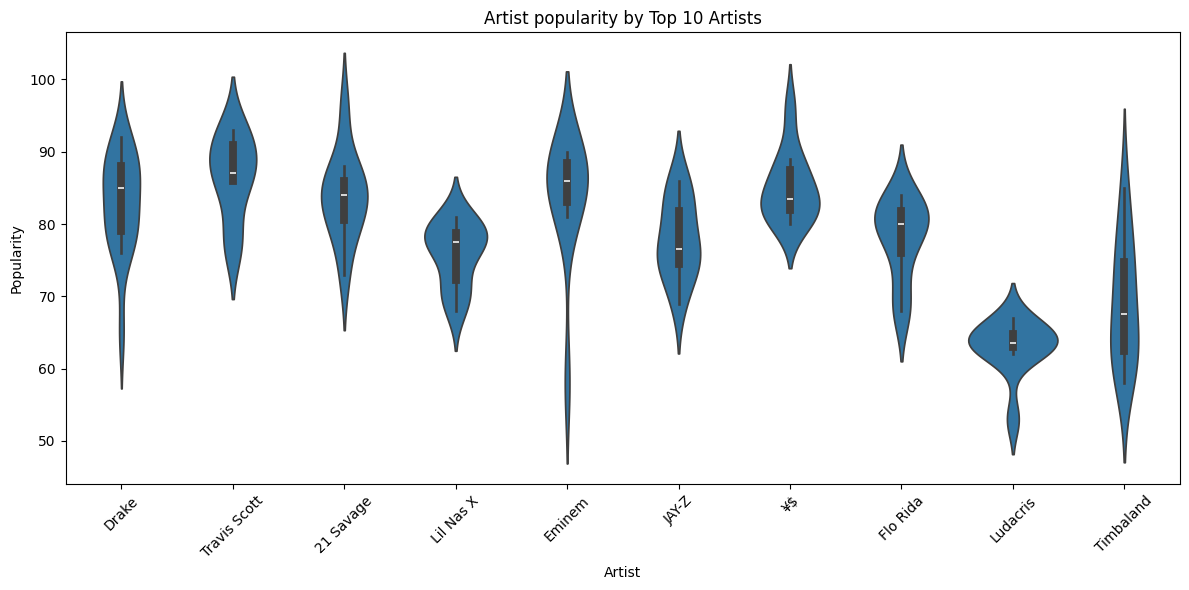

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df, x='Artist', y='Popularity')
plt.xticks(rotation=45)
plt.title('Artist popularity by Top 10 Artists')
plt.ylabel('Popularity')
plt.xlabel('Artist')
plt.tight_layout()
plt.show()
